<a href="https://colab.research.google.com/github/AuraFrizzati/ChatGPT-Prompt-Engineering-for-Developers/blob/main/06_Expanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Expanding**
Expanding is the task of taking shorter piece of text (e.g. instructions or a list of topics) and having a LLM **generate a longer piece of text** (e.g. an email or an essay about some topic).  

There are some great uses for this, such as using an LLM as a **brainstorming partner**.


## **Setup**

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In this lesson, you will **generate customer service emails** that are **tailored to each customer's review**. 

We will use one of the model's parameter, the "**temperature**" to vary the kind of **exploration** and **variety** in the **model's responses**.

## **Customize the automated reply to a customer email**

In [ ]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

`Dear Valued Customer,`

`Thank you for taking the time to leave a review about our product. We are sorry to hear that you experienced an increase in price and that the quality of the product did not meet your expectations. We apologize for any inconvenience this may have caused you.`

`We would like to assure you that we take all feedback seriously and we will be sure to pass your comments along to our team. If you have any further concerns, please do not hesitate to reach out to our customer service team for assistance`.

`Thank you again for your review and for choosing our product. We hope to have the opportunity to serve you better in the future.`

`Best regards`,

`AI customer agent`


## **Remind the model to use details from the customer's email**


Let's experiment with the **temperature parameter**. You can think of temperature as the **degree of exploration or randomness** of the model.

Example:

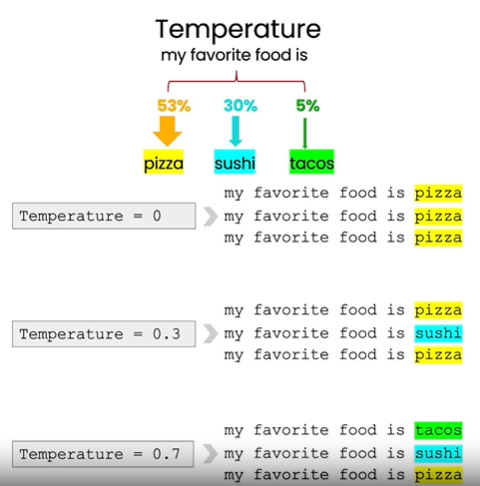

The higher the temperature, the less frequent the word that can be chosen.
- Use **temperature = 0** for systems that require **reliability** and **predictability**  
- Use **higher temperatures** for tasks that require **variety**. You can think as the assistant is more "distractable" but also **more creative**.

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

`Dear valued customer,`

`Thank you for taking the time to leave a review. We apologize for any inconvenience caused by the price increase you observed. We strive to provide competitive pricing to our customers at all times.` 

`We understand your concerns about the quality of our product, and we are sorry to hear that the motor failed after just a year of use. We encourage you to contact our customer service team to explore any available options.` 

`We appreciate your feedback and will continue to work hard to improve our products and services.` 

`Thank you again for choosing our product. `

`Best regards,`

`AI customer agent`

### **Try experimenting on your own!**

In [ ]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=1)
print(response)

`Dear Valued Customer,`

`Thank you for taking the time to write a review. We’re sorry to hear about the issue with our product and that the warranty had already expired by the time you reached out to our customer service team. We apologize for the inconvenience this may have caused.`

`If you encounter any issues with our products in the future, please don’t hesitate to reach out to our customer service team for assistance. We’re here to help and ensure our customers have a positive experience with our products.`

`We appreciate your feedback on the quality of our products and will be sure to take it into consideration as we strive to continuously improve our products and services.`

`Thank you again for your review.`

`Best regards,`
`AI customer agent`